In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [8]:
data = pd.read_excel('Monohulled_coastline_avg_Numerical.xlsx',index_col='Unnamed: 0')

In [9]:
# scale=MinMaxScaler().fit(data)
# data_scale=scale.transform(data)


In [14]:
# 构造自定义函数，用于绘制不同k值和对应轮廓系数的折线图
def k_silhouette(X, clusters):
    K = range(10,clusters+1)
    # 构建空列表，用于存储个中簇数下的轮廓系数
    S = []
    for k in K:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        labels = kmeans.labels_
        # 调用字模块metrics中的silhouette_score函数，计算轮廓系数
        S.append(metrics.silhouette_score(X, labels, metric='euclidean'))

    # 中文和负号的正常显示
    plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
    plt.rcParams['axes.unicode_minus'] = False
    # 设置绘图风格
    plt.style.use('ggplot')    
    # 绘制K的个数与轮廓系数的关系
    print(K)
    print(S)
    plt.plot(K, S, 'b*-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Coefficient')
    # 显示图形
    plt.show()


range(10, 21)
[0.8325009822632625, 0.8397541394916298, 0.8516425315364275, 0.8506817264611931, 0.8552163173767842, 0.8544171018498202, 0.8610346087563653, 0.8655465868581593, 0.8703043649472199, 0.8553459335481444, 0.8545211163794398]


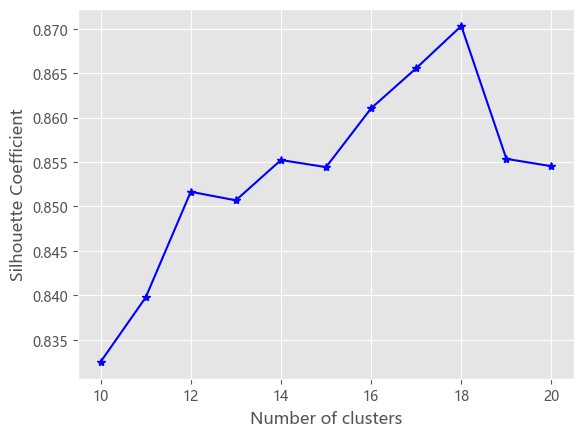

In [16]:
# 自定义函数的调用
k_silhouette(data,20)
# 305

In [12]:
cluster=KMeans(n_clusters=18,random_state=123).fit(data)
centroid=cluster.cluster_centers_
centers=pd.DataFrame(cluster.cluster_centers_)
centers


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,25.488189,204.917323,45.299213,1.070866,17.149606,2010.047244,13.885000,6.866969,26558.826772,1054.212598,3.135433e+06,207.756693,23108.452756,9.952756,1.249146e+04,242284.285621
1,22.225352,197.295775,46.056338,1.183099,6.000000,2010.323944,14.200000,6.796056,28064.154930,1103.915493,1.600000e+08,3120.000000,78973.000000,9.676056,9.094947e-13,242604.237089
2,24.902703,197.935135,45.740541,1.113514,51.156757,2010.578378,14.096000,6.768919,27144.140541,1067.043243,5.228038e+07,1387.183784,31265.594595,9.421622,4.803005e+03,234247.904054
3,30.113636,214.500000,45.977273,0.977273,16.000000,2013.090909,14.115455,6.989318,28559.068182,1084.795455,2.952000e+08,3861.000000,46333.000000,6.909091,2.389000e+03,293275.511364
4,24.888889,188.333333,44.250000,1.277778,37.000000,2009.305556,13.797778,6.502222,24947.194444,991.916667,1.020000e+08,1784.000000,90534.000000,10.694444,9.094947e-13,181711.680556
5,24.480769,190.884615,45.307692,1.192308,36.211538,2009.596154,14.034615,6.556731,27119.557692,1061.115385,2.196692e+07,461.538462,61681.480769,10.403846,6.807308e+02,193693.673077
6,23.331288,209.625767,45.601227,1.092025,17.773006,2010.699387,14.087178,6.784785,27050.527607,1070.343558,4.547423e+07,2824.705521,45829.644172,9.300613,4.406405e+03,235454.875256
7,24.134146,199.560976,45.000000,1.195122,37.780488,2009.548780,13.939512,6.553659,26176.975610,1023.060976,1.125634e+07,583.707317,52163.780488,10.451220,2.407561e+02,196615.176829
8,14.833333,181.166667,47.500000,1.166667,36.000000,2011.000000,14.538333,6.590000,30103.833333,1256.333333,7.500000e+07,624.000000,70454.000000,9.000000,9.094947e-13,239039.000000
9,23.630769,191.184615,44.630769,1.246154,14.784615,2009.676923,13.912769,6.692000,25787.446154,1030.430769,2.896308e+07,934.830769,48615.938462,10.323077,7.928615e+02,203853.907692
